In [1]:
import time
import datetime
import pandas as pd
from pandas_datareader import data as web
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('white')

In [3]:
PATH = r'C:\Users\44738\Desktop\Desktop Files\Dissertation\stoxx_50.csv'
all_tickers = pd.read_csv(PATH)
start_date = '2016-07-01'
end_date = '2021-07-01'

In [4]:
tickers = ["^STOXX50E"]

In [5]:
interval = '1d'
period1 = int(time.mktime(datetime.datetime(2016, 7, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2021, 7, 1, 23, 59).timetuple()))
stoxx = pd.DataFrame()

xlwriter = pd.ExcelWriter('historical prices.xlsx', engine='openpyxl')
for ticker in tickers:
    query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
    df = pd.read_csv(query_string)
    df.drop(columns=['Open', 'Close', 'Low', 'High', 'Volume'], inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df.rename(columns={'Adj Close': ticker}, inplace=True)
    stoxx = pd.concat([stoxx, df], axis=1)

In [6]:
# Dont re-run
interval = '1d'
period1 = int(time.mktime(datetime.datetime(2016, 7, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2021, 7, 1, 23, 59).timetuple()))
balanced = pd.DataFrame()

xlwriter = pd.ExcelWriter('historical prices.xlsx', engine='openpyxl')
for ticker in all_tickers['all_stocks']:
    query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
    df = pd.read_csv(query_string)
    df.drop(columns=['Open', 'Close', 'Low', 'High', 'Volume'], inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df.rename(columns={'Adj Close': ticker}, inplace=True)
    balanced = pd.concat([balanced, df], axis=1)
balanced = balanced.iloc[1:]

In [7]:
screener_list = ['KNEBV.HE','DB1.DE','SU.PA','SAF.PA','ASML.AS','ISP.MI','AI.PA','ENGI.PA',
                 'KER.PA','DPW.DE','AMS.MC','BMW.DE','DTE.DE','IBE.MC','EL.PA','SAN.MC',
                 'INGA.AS','MUV2.DE','DG.PA','IFX.DE', 'VNA.DE','ITX.MC']
screened = pd.DataFrame()

for ticker in screener_list:
    query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
    df = pd.read_csv(query_string)
    df.drop(columns=['Open', 'Close', 'Low', 'High', 'Volume'], inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df.rename(columns={'Adj Close': ticker}, inplace=True)
    screened = pd.concat([screened, df], axis=1)
screened = screened.iloc[1:]

In [8]:
balanced_return = balanced.pct_change()[1:]
weights = [1/len(balanced.columns)] * len(balanced.columns)
balanced_weighted = (weights * balanced_return)

In [9]:
balanced_portfolio = pd.DataFrame(balanced_weighted.sum(axis=1)).rename(columns={0:'Stoxx 50 Balanced'})

In [10]:
cumu_balanced = (balanced_portfolio + 1).cumprod()
cumu_balanced = cumu_balanced - 1
cumu_balanced = cumu_balanced * 100

In [11]:
screened_return = screened.pct_change()[1:]
weights = [1/len(screened.columns)] * len(screened.columns)
screened_weighted = (weights * screened_return)
screened_portfolio = pd.DataFrame(screened_weighted.sum(axis=1)).rename(columns={0:'Stoxx 50 Screened'})
cumu_screened = (screened_portfolio + 1).cumprod()
cumu_screened = cumu_screened - 1
cumu_screened = cumu_screened * 100

In [12]:
stoxx = stoxx.iloc[1:]

In [13]:
stoxx_return = stoxx.pct_change()[1:]
weights = [1/len(stoxx.columns)] * len(stoxx.columns)
stoxx_weighted = (weights * stoxx_return)

In [14]:
stoxx_portfolio = pd.DataFrame(stoxx_weighted.sum(axis=1)).rename(columns={0:'Stoxx 50'})
cumu_stoxx = (stoxx_portfolio + 1).cumprod()
cumu_stoxx = cumu_stoxx - 1
cumu_stoxx = cumu_stoxx * 100

In [15]:
def value_at_risk(returns, confidence_level=.05):
    
    print('VaR:', returns.quantile(confidence_level, interpolation='higher'))
    # Calculating VaR
    return float(returns.quantile(confidence_level, interpolation='higher'))

In [16]:
def expected_shortfall(returns, confidence_level=.05):
    
    # Calculating VaR
    var = value_at_risk(returns, confidence_level)
    print('ES: ', returns[returns.lt(var)].mean())
    # ES is the average of the worst losses (under var)
    return float(returns[returns.lt(var)].mean())

In [17]:
print(cumu_stoxx.iloc[-1])
print(cumu_balanced.iloc[-1])
print(cumu_screened.iloc[-1])

Stoxx 50    45.00761
Name: 2021-07-01 00:00:00, dtype: float64
Stoxx 50 Balanced    118.918763
Name: 2021-07-01 00:00:00, dtype: float64
Stoxx 50 Screened    132.684908
Name: 2021-07-01 00:00:00, dtype: float64


C:\Users\44738\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\44738\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\44738\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

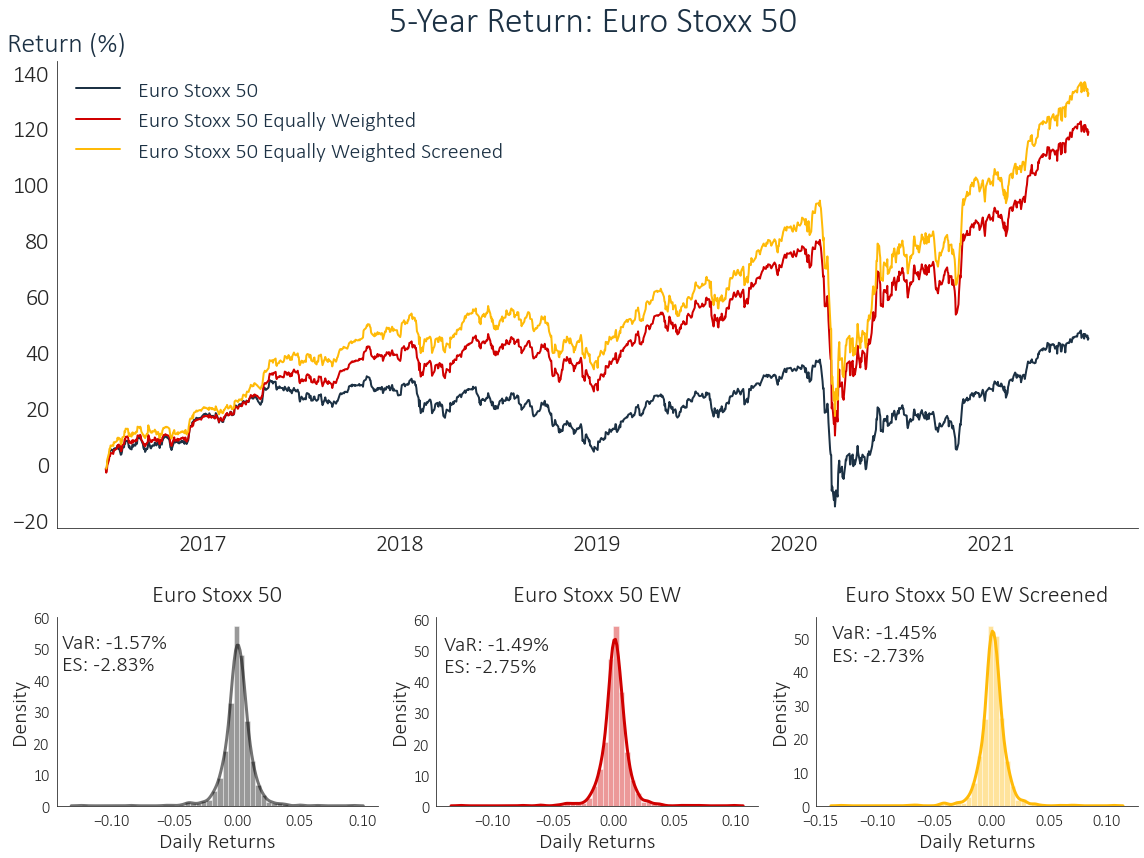

In [18]:
fig = plt.figure(figsize=(16,12))
ax1 = plt.subplot2grid((6, 3), (0,0), rowspan=4, colspan=3)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
plt.xticks(fontsize=24, fontname='Calibri', weight='light', color=(0,0,0,0.85))
plt.yticks(fontsize=24, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax2 = plt.subplot2grid((6, 3), (4,0), rowspan=2, colspan=1)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
plt.xticks(fontsize=16, fontname='Calibri', weight='light', color=(0,0,0,0.85))
plt.yticks(fontsize=16, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax2.set_title("Euro Stoxx 50", fontsize=24, fontname='Calibri', weight='light', color=(0,0,0,0.85), y=1.05)
ax3 = plt.subplot2grid((6, 3), (4,1), rowspan=2, colspan=1)
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
plt.xticks(fontsize=16, fontname='Calibri', weight='light', color=(0,0,0,0.85))
plt.yticks(fontsize=16, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax3.set_title("Euro Stoxx 50 EW", fontsize=24, fontname='Calibri', weight='light', color=(0,0,0,0.85), y=1.05)
ax4 = plt.subplot2grid((6, 3), (4,2), rowspan=2, colspan=1)
ax4.spines["top"].set_visible(False)
ax4.spines["right"].set_visible(False)
plt.xticks(fontsize=16, fontname='Calibri', weight='light', color=(0,0,0,0.85))
plt.yticks(fontsize=16, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax4.set_title("Euro Stoxx 50 EW Screened", fontsize=24, fontname='Calibri', weight='light', color=(0,0,0,0.85), y=1.05)

ax1.set_ylabel('Return (%)', fontsize=28, fontname='Calibri', fontweight='light', labelpad=6, color='#1C3144', rotation='horizontal', horizontalalignment='left', y=1.01)

ax1.set_title(label='5-Year Return: Euro Stoxx 50 ', fontsize=36, color='#1C3144', fontname='Calibri', weight='ultralight', y=1.05)
ax1.plot(cumu_stoxx, color='#1C3144', lw=2, label='Euro Stoxx 50')
ax1.plot(cumu_balanced, color='#D00000', lw=2, label='Euro Stoxx 50 Equally Weighted')
ax1.plot(cumu_screened, color='#FFBA08', lw=2, label='Euro Stoxx 50 Equally Weighted Screened')
L = ax1.legend(frameon=False, loc='upper left', fontsize=22)
plt.setp(L.texts, family='Calibri', weight='light', color='#1C3144')

sns.distplot(stoxx_portfolio, color=(0,0,0,0.55), bins=50, ax=ax2, kde_kws=dict(linewidth=3))
sns.distplot(balanced_portfolio, color='#D00000', bins=50, ax=ax3, kde_kws=dict(linewidth=3))
sns.distplot(screened_portfolio, color='#FFBA08', bins=50, ax=ax4, kde_kws=dict(linewidth=3))

ax2.set_xlabel("Daily Returns", fontsize=22, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax2.text(x=-0.14, y=50, s='VaR: -1.57%', fontdict={'fontname':'calibri', 'weight':'light', 'size':22, 'color':(0,0,0,0.85)})
ax2.text(x=-0.14, y=43, s='ES: -2.83%', fontdict={'fontname':'calibri', 'weight':'light', 'size':22, 'color':(0,0,0,0.85)})

ax3.set_xlabel("Daily Returns", fontsize=22, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax3.text(x=-0.14, y=50, s='VaR: -1.49%', fontdict={'fontname':'calibri', 'weight':'light', 'size':22, 'color':(0,0,0,0.85)})
ax3.text(x=-0.14, y=43, s='ES: -2.75%', fontdict={'fontname':'calibri', 'weight':'light', 'size':22, 'color':(0,0,0,0.85)})

ax4.set_xlabel("Daily Returns", fontsize=22, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax4.text(x=-0.14, y=50, s='VaR: -1.45%', fontdict={'fontname':'calibri', 'weight':'light', 'size':22, 'color':(0,0,0,0.85)})
ax4.text(x=-0.14, y=43, s='ES: -2.73%', fontdict={'fontname':'calibri', 'weight':'light', 'size':22, 'color':(0,0,0,0.85)})

ax2.set_ylabel("Density", fontsize=22, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax3.set_ylabel("Density", fontsize=22, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax4.set_ylabel("Density", fontsize=22, fontname='Calibri', weight='light', color=(0,0,0,0.85))


plt.tight_layout(h_pad=3)
plt.savefig(r"C:\Users\44738\Desktop\Desktop Files\Dissertation\images\STOXX_Graph.jpeg", dpi=500)

In [19]:
returns_frame = pd.concat([stoxx_portfolio, balanced_portfolio, screened_portfolio], axis=1)

In [20]:
returns_frame.to_csv("stoxx_returns_dataframe.csv")

In [21]:
def sharpe_ratio(return_series, N, rf):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    print(sigma)
    return mean / sigma

N = 255 #255 trading days in a year
rf =0.01 #1% risk free rate

In [22]:
def sortino_ratio(series, N,rf):
    mean = series.mean() * N -rf
    std_neg = series[series<0].std()*np.sqrt(N)
    return mean/std_neg

In [23]:
def max_drawdown(return_series):
    comp_ret = (return_series+1).cumprod()
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret/peak)-1
    return dd.min()

In [24]:
sharpes = []
for col in returns_frame:
    sharpe = sharpe_ratio(returns_frame[col], N, rf)
    sharpes.append(sharpe)

0.1853234732671533
0.1844274050453838
0.18969943363466382


In [25]:
sortinos = []
for col in returns_frame:
    sortino = sortino_ratio(returns_frame[col], N, rf)
    sortinos.append(sortino)

In [26]:
dds = []
for col in returns_frame:
    dd = max_drawdown(returns_frame[col])
    dds.append(dd)

In [27]:
returns_frame.columns

Index(['Stoxx 50', 'Stoxx 50 Balanced', 'Stoxx 50 Screened'], dtype='object')

In [28]:
calmars = [0, 0, 0]
calmars[0] = returns_frame['Stoxx 50'].mean()*255/abs(-0.33924960006097205)
calmars[1] = returns_frame['Stoxx 50 Balanced'].mean()*255/abs(-0.3900637330909167)
calmars[2] = returns_frame['Stoxx 50 Screened'].mean()*255/abs(-0.3864815399423005)
calmars

[0.27417844653324264, 0.44419556581870473, 0.4833563371101184]

In [29]:
var = [0, 0, 0]
var[0] = value_at_risk(stoxx_portfolio)
var[1] = value_at_risk(balanced_portfolio)
var[2] = value_at_risk(screened_portfolio)
var

VaR: Stoxx 50   -0.015712
Name: 0.05, dtype: float64
VaR: Stoxx 50 Balanced   -0.014896
Name: 0.05, dtype: float64
VaR: Stoxx 50 Screened   -0.014974
Name: 0.05, dtype: float64


[-0.015711902253786603, -0.014895631241794702, -0.0149737761501602]

In [30]:
es = [0, 0, 0]
es[0] = expected_shortfall(stoxx_portfolio)
es[1] = expected_shortfall(balanced_portfolio)
es[2] = expected_shortfall(screened_portfolio)
es

VaR: Stoxx 50   -0.015712
Name: 0.05, dtype: float64
ES:  Stoxx 50   -0.028278
dtype: float64
VaR: Stoxx 50 Balanced   -0.014896
Name: 0.05, dtype: float64
ES:  Stoxx 50 Balanced   -0.027526
dtype: float64
VaR: Stoxx 50 Screened   -0.014974
Name: 0.05, dtype: float64
ES:  Stoxx 50 Screened   -0.027893
dtype: float64


[-0.02827777302065068, -0.0275255911298662, -0.027893322678885463]

In [31]:
btstats = pd.DataFrame()
btstats['Sortino'] = sortinos
btstats['Sharpe'] = sharpes
btstats['Calmar'] = calmars
btstats['Max DD'] = dds
btstats['VaR'] = var
btstats['ES'] = es

btstats['temp'] = ['Stoxx 50', 'Stoxx EW', 'Stoxx EW Screened']
btstats.set_index('temp', inplace=True)

In [32]:
btstats

,Sortino,Sharpe,Calmar,Max DD,VaR,ES
temp,,,,,,
Stoxx 50,0.524910,0.447946,0.274178,-0.382740,-0.015712,-0.028278
Stoxx EW,1.025930,0.885251,0.444196,-0.388479,-0.014896,-0.027526
Stoxx EW Screened,1.088957,0.932044,0.483356,-0.396816,-0.014974,-0.027893


In [33]:
cumu_screened.tail()

,Stoxx 50 Screened
Date,
2021-06-25,136.399507
2021-06-28,133.482575
2021-06-29,134.279412
2021-06-30,131.701504
2021-07-01,132.684908


Start date,2016-07-05
End date,2021-07-01
Total months,60
,Backtest
Annual return,18.1%
Cumulative returns,132.7%
Annual volatility,18.9%
Sharpe ratio,0.98
Calmar ratio,0.46
Stability,0.82
Max drawdown,-39.7%


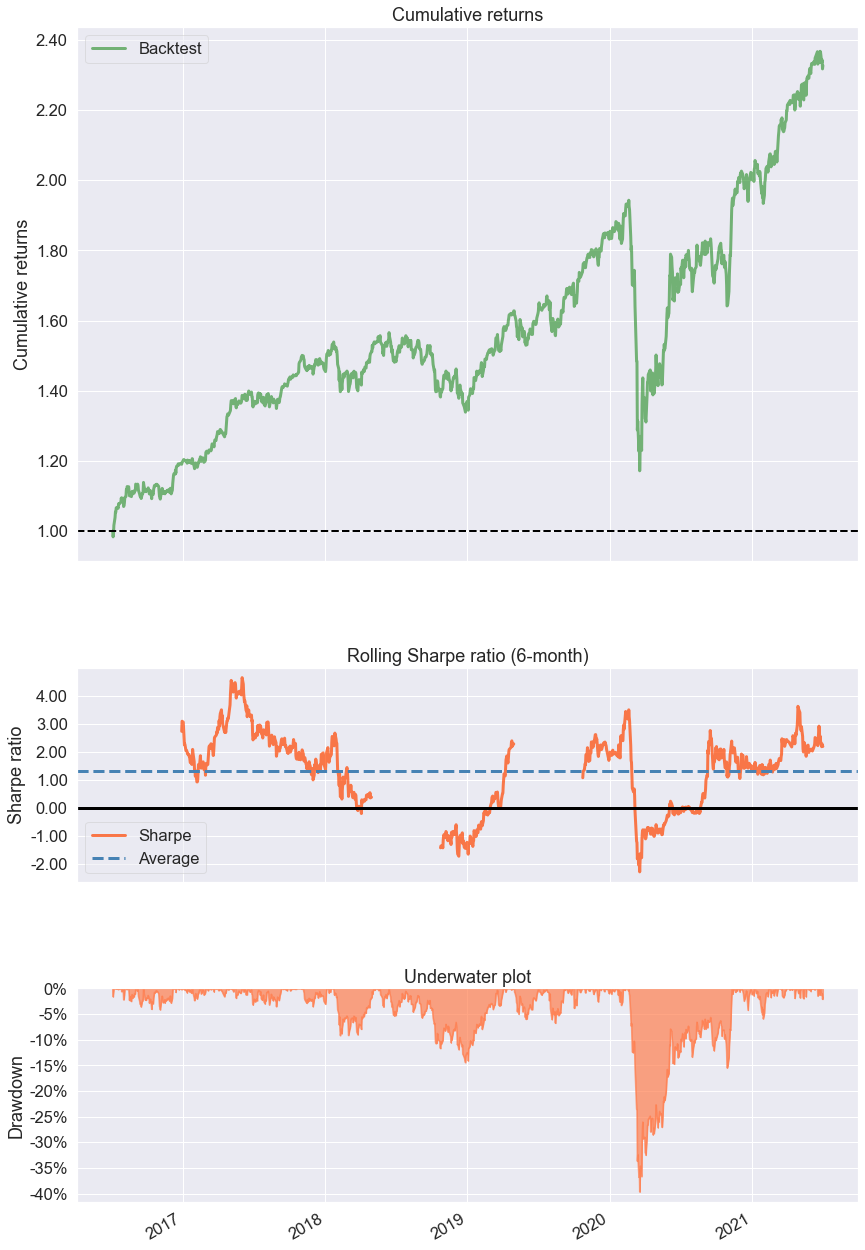

In [37]:
import pyfolio as pf
pf.create_simple_tear_sheet(returns_frame['Stoxx 50 Screened'])